<h1>Advanced Data Science Capstone Project</h1>

<h1>Vaccination against COVID vs. New Cases of COVID</h1>
<h2>(ETL, EDA, and Visualization)</h2>

<h2>ETL, EDA, and Visualization of Data for the Whole World</h2>

<h3>1. Analysis of data for the whole world since the beginning of pandemic</h3>

<b>Data Cleansing</b>. The main problem with data in this dataset is that there are many NaNs. I use three strategies to deal with them.
1. I remove columns that contain only NaNs.
2. I replace NaNs with zeros.
3. In order not to deal with many zeros in the beginning, I am going to use several datasets: 1) the dataset for analysis and visualization of cases of COVID - since the beginning of pandemic; 2) the dataset for analysis and visualization of the number of people who got vaccinated (by, at least, one injection of vaccine) - since the beginning of vaccination; 3) the dataset for analysis and visualization of the number of people who got fully vaccinated - since the beginning of full vaccination; 4) the dataset for analysis and visualization of the number of total boosters - since the beginning of revaccination.

The first dataset will contain data for all the days, from the very beginning. However, I remove columns "hosp_patients" and "icu_patients" since they do not contain any data for the world. In other columns, NaNs will be replaced with zeroes.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from datetime import datetime
%matplotlib inline

In [2]:
#reading dataset which was created in the previous notebook
df = pd.read_csv("covid-data.csv")

In [3]:
df_filter = df['location']=='World'
df_world = df[df_filter]
df_world = df_world[['location','date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_world = df_world.fillna(0)
df_world.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
151980,World,2020-01-22,557.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
151981,World,2020-01-23,655.0,98.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
151982,World,2020-01-24,941.0,286.0,26.0,8.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
151983,World,2020-01-25,1434.0,493.0,42.0,16.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
151984,World,2020-01-26,2118.0,684.0,56.0,14.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09


In [4]:
df_world.to_csv("covid-data-world.csv")

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


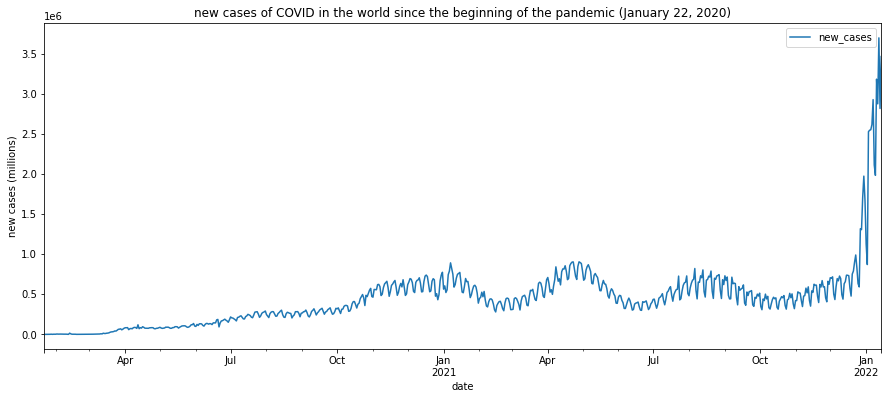

In [5]:
df_world_ = df_world[['date', 'new_cases']]
#pd.to_datetime(df_world_['date'])
df_world_['date'] = pd.to_datetime(df_world_['date'])
df_world_.index = df_world_['date']
del df_world_['date']

df_world_.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("new cases (millions)")
plt.title("new cases of COVID in the world since the beginning of the pandemic (January 22, 2020)")
plt.show()

In [6]:
max_new_cases = df_world['new_cases'].max()
print("Maximum of new cases: ", max_new_cases)
df_filter_max_new_cases = df_world['new_cases']==max_new_cases
df_max_new_cases = df_world[df_filter_max_new_cases]
max_new_cases_index = df_max_new_cases.index[0]
max_new_cases_date = df_max_new_cases.loc[max_new_cases_index,'date']
print("Date of maximum of new cases: ", max_new_cases_date)

Maximum of new cases:  3701643.0
Date of maximum of new cases:  2022-01-12


This diagram indicates that the situation with COVID in the world now is worse than ever before.

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


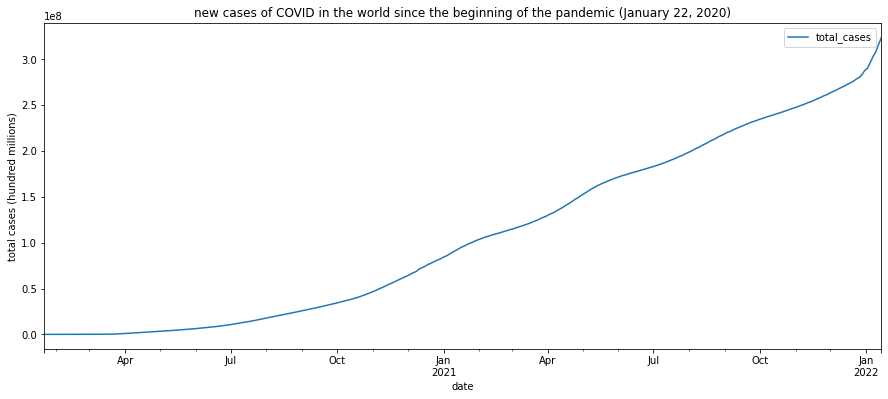

In [7]:
df_world_ = df_world[['date', 'total_cases']]
#pd.to_datetime(df_world_['date'])
df_world_['date'] = pd.to_datetime(df_world_['date'])
df_world_.index = df_world_['date']
del df_world_['date']

df_world_.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("total cases (hundred millions)")
plt.title("new cases of COVID in the world since the beginning of the pandemic (January 22, 2020)")
plt.show()

In [8]:
current_total_cases = df_world['total_cases'].max()
print("All the cases of COVID until now: ", current_total_cases)

All the cases of COVID until now:  323567887.0


<h3>2. Analysis of data for the whole world since the beginning of vaccination</h3>

The second dataset will contain data since the beginning of vaccination.

In [9]:
df_filter1 = df_world['date']>='2020-12-01'
df_world1 = df_world[df_filter1]
df_world1.head(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
152294,World,2020-12-01,64070445.0,621019.0,1538151.0,12723.0,0.0,1.0,0.0,0.0,0.0,7.874966e+09
152295,World,2020-12-02,64724036.0,653591.0,1550814.0,12663.0,0.0,1.0,0.0,0.0,0.0,7.874966e+09
152296,World,2020-12-03,65420332.0,696296.0,1563393.0,12579.0,0.0,1.0,0.0,0.0,0.0,7.874966e+09
152297,World,2020-12-04,66108917.0,688585.0,1575836.0,12443.0,1.0,2.0,0.0,0.0,1.0,7.874966e+09
152298,World,2020-12-05,66755295.0,646378.0,1586163.0,10327.0,1.0,2.0,0.0,0.0,0.0,7.874966e+09


In [10]:
df_world1.to_csv("covid-data-world-vaccination.csv")

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


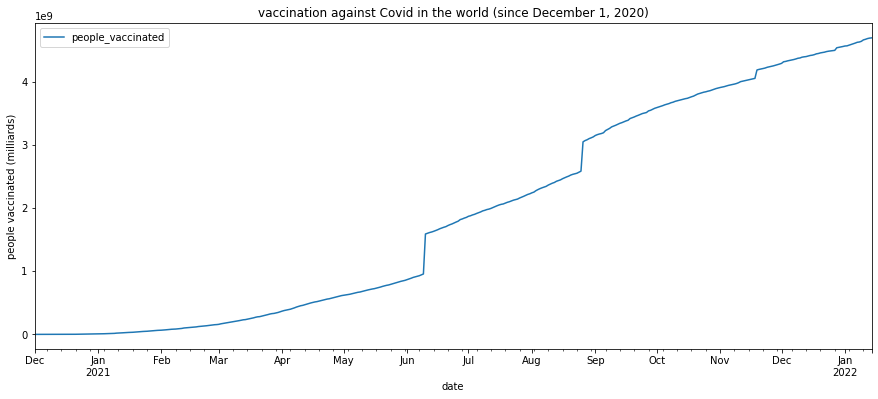

In [11]:
df_world_1 = df_world1[['date', 'people_vaccinated']]
#pd.to_datetime(df_world_1['date'])
df_world_1['date'] = pd.to_datetime(df_world_1['date'])
df_world_1.index = df_world_1['date']
del df_world_1['date']

df_world_1.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("people vaccinated (milliards)")
plt.title("vaccination against Covid in the world (since December 1, 2020)")
plt.show()

In [12]:
current_people_vaccinated = df_world['people_vaccinated'].max()
print("The number of people who have been vaccinated against COVID until now: ", current_people_vaccinated)

The number of people who have been vaccinated against COVID until now:  4702962017.0


In [13]:
df_filter_total_people_vaccinated = df_world['people_vaccinated']==current_people_vaccinated
df_total_people_vaccinated = df_world[df_filter_total_people_vaccinated]
total_people_vaccinated_index = df_total_people_vaccinated.index[0]
world_polulation = df_total_people_vaccinated.loc[total_people_vaccinated_index,'population']
print("Percentage of people vaccinated: ", (current_people_vaccinated/world_polulation)*100, "%")

Percentage of people vaccinated:  59.72041248489344 %


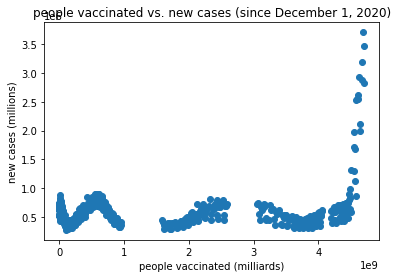

In [14]:
plt.scatter(df_world1['people_vaccinated'], df_world1['new_cases'])
plt.xlabel("people vaccinated (milliards)")
plt.ylabel("new cases (millions)")
plt.title("people vaccinated vs. new cases (since December 1, 2020)")
plt.show()

In [15]:
#correlation between the progress of vaccination and new cases of COVID
scipy.stats.pearsonr(df_world1['people_vaccinated'], df_world1['new_cases'])

(0.2791306616254736, 8.957196029977613e-09)

The correlation between the progress of vaccination and new cases of COVID is actually positive, not negative. This is not surprising considering the current wave of COVID in the world.

<h3>3. Analysis of data for the whole world since the beginning of full vaccination</h3>

The third dataset will contain data since the beginning of full vaccination (that is, since the time when first people got fully vaccinated - usually, by two vaccine doses).

In [16]:
df_filter2 = df_world['date']>='2020-12-13'
df_world2 = df_world[df_filter2]
df_world2.head(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
152306,World,2020-12-13,72517871.0,530322.0,1671778.0,7788.0,25570.0,21565.0,4641.0,0.0,25556.0,7.874966e+09
152307,World,2020-12-14,73051808.0,533937.0,1680941.0,9163.0,30008.0,25863.0,4741.0,0.0,4438.0,7.874966e+09
152308,World,2020-12-15,73709443.0,657635.0,1694679.0,13738.0,1608410.0,102037.0,4972.0,0.0,1578402.0,7.874966e+09
152309,World,2020-12-16,74436925.0,727482.0,1708544.0,13865.0,1770211.0,258358.0,5410.0,0.0,161801.0,7.874966e+09
152310,World,2020-12-17,75177304.0,740379.0,1721905.0,13361.0,2046421.0,527421.0,6124.0,0.0,276210.0,7.874966e+09


In [17]:
df_world2.to_csv("covid-data-world-full-vaccination.csv")

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


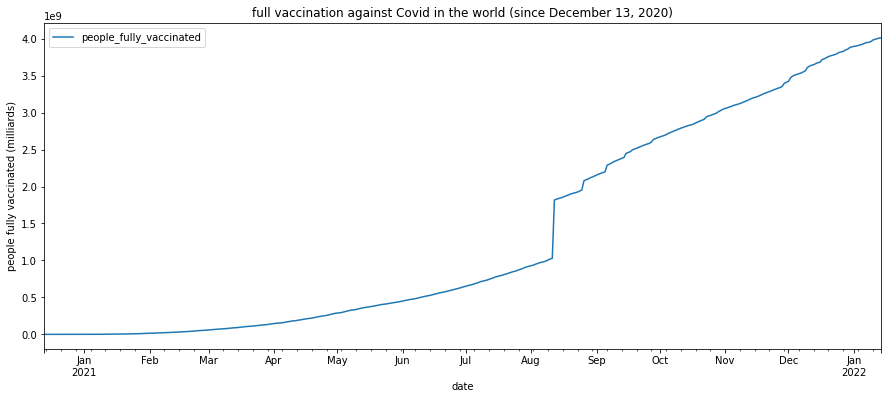

In [18]:
df_world_2 = df_world2[['date', 'people_fully_vaccinated']]
#pd.to_datetime(df_world_2['date'])
df_world_2['date'] = pd.to_datetime(df_world_2['date'])
df_world_2.index = df_world_2['date']
del df_world_2['date']

df_world_2.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("people fully vaccinated (milliards)")
plt.title("full vaccination against Covid in the world (since December 13, 2020)")
plt.show()

In [19]:
current_people_fully_vaccinated = df_world['people_fully_vaccinated'].max()
print("The number of people who have been fully vaccinated against COVID until now: ", current_people_fully_vaccinated)

The number of people who have been fully vaccinated against COVID until now:  4011094460.0


In [20]:
print("Percentage of people fully vaccinated: ", (current_people_fully_vaccinated/world_polulation)*100, "%")

Percentage of people fully vaccinated:  50.93475448051251 %


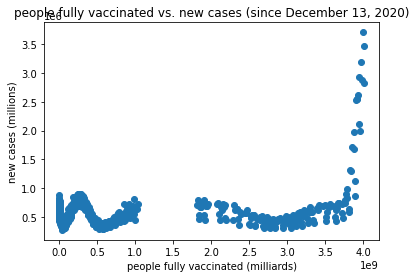

In [21]:
plt.scatter(df_world2['people_fully_vaccinated'], df_world2['new_cases'])
plt.xlabel("people fully vaccinated (milliards)")
plt.ylabel("new cases (millions)")
plt.title("people fully vaccinated vs. new cases (since December 13, 2020)")
plt.show()

In [22]:
#correlation between the progress of full vaccination and new cases of COVID
scipy.stats.pearsonr(df_world2['people_fully_vaccinated'], df_world2['new_cases'])

(0.3487572462874803, 7.956606523579917e-13)

<h3>4. Analysis of data for the whole world since the beginning of revaccination</h3>

In [23]:
df_filter3 = df_world['date']>='2020-12-29'
df_world3 = df_world[df_filter3]
df_world3.head(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
152322,World,2020-12-29,82218626.0,669957.0,1851913.0,15084.0,6944240.0,5348077.0,28740.0,1.0,986786.0,7.874966e+09
152323,World,2020-12-30,82959319.0,740693.0,1867542.0,15629.0,8102676.0,6498359.0,35721.0,1.0,1158436.0,7.874966e+09
152324,World,2020-12-31,83734405.0,775086.0,1880791.0,13249.0,11826911.0,7187232.0,38829.0,1.0,3724235.0,7.874966e+09
152325,World,2021-01-01,84299430.0,565025.0,1890462.0,9671.0,12038856.0,7393605.0,44826.0,3.0,211945.0,7.874966e+09
152326,World,2021-01-02,84904469.0,605039.0,1898924.0,8462.0,13223456.0,8576943.0,47710.0,3.0,1184600.0,7.874966e+09


In [24]:
df_world3.to_csv("covid-data-world-revaccination.csv")

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


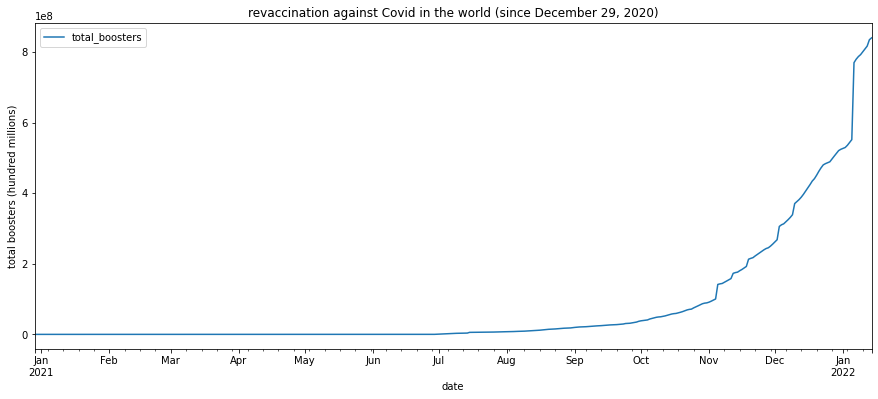

In [25]:
df_world_3 = df_world3[['date', 'total_boosters']]
#pd.to_datetime(df_world_3['date'])
df_world_3['date'] = pd.to_datetime(df_world_3['date'])
df_world_3.index = df_world_3['date']
del df_world_3['date']

df_world_3.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("total boosters (hundred millions)")
plt.title("revaccination against Covid in the world (since December 29, 2020)")
plt.show()

In [26]:
current_total_boosters = df_world['total_boosters'].max()
print("The number of total boosters against COVID until now: ", current_total_boosters)

The number of total boosters against COVID until now:  840696941.0


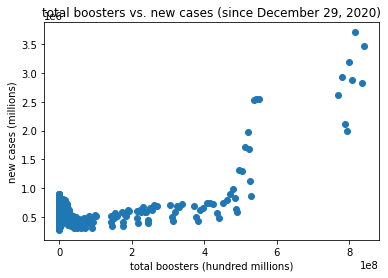

In [27]:
plt.scatter(df_world3['total_boosters'], df_world3['new_cases'])
plt.xlabel("total boosters (hundred millions)")
plt.ylabel("new cases (millions)")
plt.title("total boosters vs. new cases (since December 29, 2020)")
plt.show()

In [28]:
#correlation between the progress of revaccination and new cases of COVID
scipy.stats.pearsonr(df_world3['total_boosters'], df_world3['new_cases'])

(0.7414949244991715, 7.674905105269193e-68)

<h2>ETL, EDA, and Visualization of Data for the United Arab Emirates</h2>

I chose United Arab Emirates for the first example because this country has the highest number of vaccinated (by, at least, one dose of vaccine) and fully vaccinated people.

In [29]:
df_filter = df['location']=='United Arab Emirates'
df_uae = df[df_filter]
df_uae = df_uae[['date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_uae = df_uae.fillna(method='ffill')
df_uae = df_uae.fillna(0)
df_uae.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
145509,2022-01-10,788187.0,2562.0,2174.0,0.0,22877196.0,9881456.0,9158395.0,3828526.0,36055.0,9991083.0
145510,2022-01-11,790698.0,2511.0,2177.0,3.0,22895785.0,9890188.0,9168204.0,3837393.0,18589.0,9991083.0
145511,2022-01-12,793314.0,2616.0,2181.0,4.0,22929333.0,9890188.0,9178459.0,3860293.0,33548.0,9991083.0
145512,2022-01-13,795997.0,2683.0,2182.0,1.0,22972257.0,9890325.0,9188112.0,3893820.0,42924.0,9991083.0
145513,2022-01-14,799065.0,3068.0,2185.0,3.0,22985689.0,9890572.0,9188341.0,3906776.0,13432.0,9991083.0


In [30]:
df_filter_date = df_uae['date'].max()
df_index = df_uae.loc[df_uae['date']==df_filter_date].index[0]
uae_population = df_uae.loc[df_index, 'population']
print("Total population of UAE:", uae_population)
print("Percentage of vaccinated people in UAE:", df_uae['people_vaccinated'].max()/uae_population)
print("Percentage of fully vaccinated people in UAE:", df_uae['people_fully_vaccinated'].max()/uae_population)

Total population of UAE: 9991083.0
Percentage of vaccinated people in UAE: 0.9899399294350772
Percentage of fully vaccinated people in UAE: 0.919654155610558


In [31]:
#removing outliers
uae_max_new_cases = df_uae['new_cases'].max()
df_uae = df_uae[df_uae.new_cases != uae_max_new_cases]
df_uae = df_uae[df_uae.new_cases != 0]

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


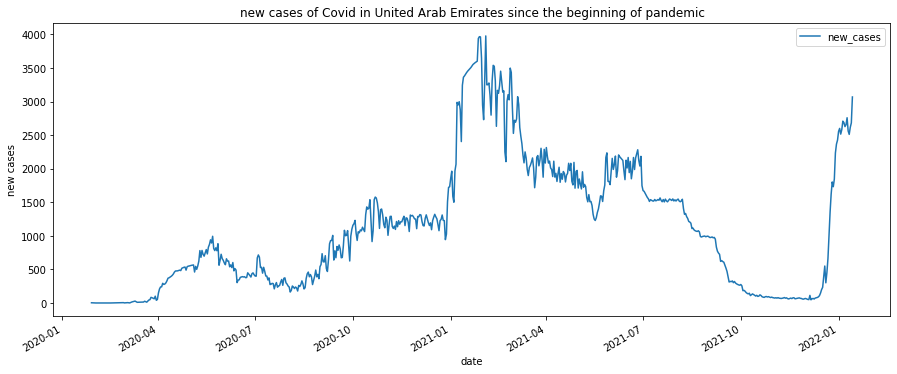

In [32]:
df_uae_ = df_uae[['date', 'new_cases']]
#pd.to_datetime(df_uae_['date'])
df_uae_['date'] = pd.to_datetime(df_uae_['date'])
df_uae_.index = df_uae_['date']
del df_uae_['date']

df_uae_.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("new cases")
plt.title("new cases of Covid in United Arab Emirates since the beginning of pandemic")
plt.show()

In [33]:
uae_max_new_cases = df_uae['new_cases'].max()
print("Maximum new cases in UAE: ", uae_max_new_cases)
df_filter_uae_max_new_cases = df_uae['new_cases']==uae_max_new_cases
df_uae_max_new_cases = df_uae[df_filter_uae_max_new_cases]
uae_max_new_cases_index = df_uae_max_new_cases.index[0]
date_uae_max_new_cases = df_uae_max_new_cases.loc[uae_max_new_cases_index,'date']
print("Date of maximum new cases in UAE: ", date_uae_max_new_cases)

Maximum new cases in UAE:  3977.0
Date of maximum new cases in UAE:  2021-02-03


In [34]:
df_filter_date = df_uae['date'].max()
df_index = df_uae.loc[df_uae['date']==df_filter_date].index[0]
most_recent_new_cases = df_uae.loc[df_index, 'new_cases']
print("Most recent number of new cases in UAE:", most_recent_new_cases)
print("Date:", df_filter_date)

Most recent number of new cases in UAE: 3068.0
Date: 2022-01-14


Even though 99% of the total population of UAE are vaccinated and 92% are fully vaccinated, the number of new cases is growing.

In [35]:
#creating new dataset for data beginning from December last year
df_filter1 = df_uae['date']>='2021-12'
df_uae1 = df_uae[df_filter1]
df_uae1.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
145469,2021-12-01,742109.0,68.0,2148.0,1.0,21870668.0,9881456.0,8949784.0,3030527.0,24744.0,9991083.0
145471,2021-12-03,742163.0,54.0,2148.0,0.0,21870668.0,9881456.0,8949784.0,3030527.0,24744.0,9991083.0
145472,2021-12-04,742214.0,51.0,2148.0,0.0,21870668.0,9881456.0,8949784.0,3030527.0,24744.0,9991083.0
145473,2021-12-05,742328.0,114.0,2148.0,0.0,21870668.0,9881456.0,8949784.0,3030527.0,24744.0,9991083.0
145474,2021-12-06,742376.0,48.0,2149.0,1.0,21947593.0,9881456.0,8964619.0,3092617.0,24744.0,9991083.0


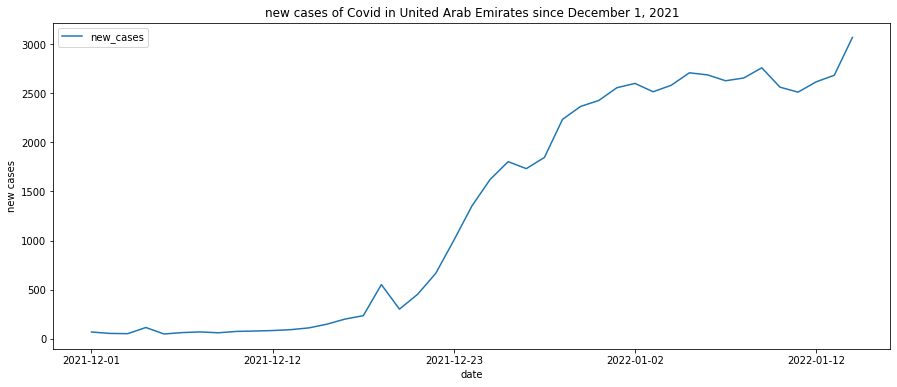

In [36]:
df_uae_1 = df_uae1[['date', 'new_cases']]
pd.to_datetime(df_uae_1['date'])
#df_uae_1['date'] = pd.to_datetime(df_uae_1['date'])
df_uae_1.index = df_uae_1['date']
del df_uae_1['date']

df_uae_1.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("new cases")
plt.title("new cases of Covid in United Arab Emirates since December 1, 2021")
plt.show()

This diagram shows that the number of new cases of COVID in UAE is growing, in spite of the fact that 99% of the population have been vaccinated.

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


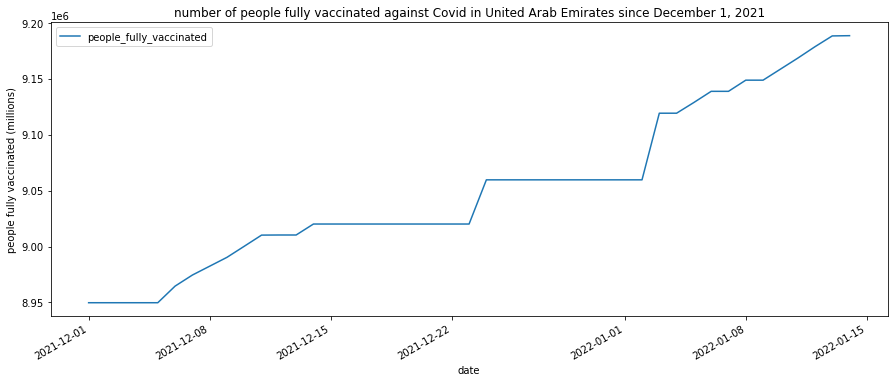

In [37]:
df_uae_11 = df_uae1[['date', 'people_fully_vaccinated']]
df_uae_11['date'] = pd.to_datetime(df_uae_11['date'])
df_uae_11.index = df_uae_11['date']
del df_uae_11['date']

df_uae_11.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("people fully vaccinated (millions)")
plt.title("number of people fully vaccinated against Covid in United Arab Emirates since December 1, 2021")
plt.show()

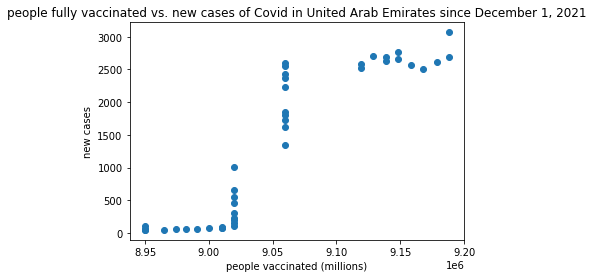

In [38]:
plt.scatter(df_uae1['people_fully_vaccinated'], df_uae1['new_cases'])
plt.xlabel("people vaccinated (millions)")
plt.ylabel("new cases")
plt.title("people fully vaccinated vs. new cases of Covid in United Arab Emirates since December 1, 2021")
plt.show()

In [39]:
scipy.stats.pearsonr(df_uae1['people_fully_vaccinated'], df_uae1['new_cases'])

(0.8941337379745568, 6.814705564740431e-16)

Correlation coefficient between people fully vaccinated and new cases of COVID in UAE in December - beginning of January is not just positive but is 0.88. Probably it is the result of the current situation with COVID in UAE when the number of fully vaccinated people and the number of new cases of COVID are growing together.

<h2>ETL, EDA, and Visualization of Data for the USA</h2>

In [40]:
df_filter = df['location']=='United States'
df_usa = df[df_filter]
df_usa = df_usa[['date','location','total_cases','new_cases','total_deaths','new_deaths', 'hosp_patients', 'icu_patients',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_usa = df_usa.fillna(method='ffill')
df_usa = df_usa.fillna(0)
df_usa = df_usa[df_filter]
df_usa.tail()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,location,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,icu_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
146948,2022-01-10,United States,61626123.0,1364418.0,839863.0,1835.0,142069.0,24468.0,523624949.0,247798779.0,206858336.0,77704911.0,1116762.0,332915074.0
146949,2022-01-11,United States,62385927.0,759804.0,842141.0,2278.0,145643.0,25049.0,524740160.0,248101414.0,207031762.0,78347179.0,1115211.0,332915074.0
146950,2022-01-12,United States,63285605.0,899678.0,844588.0,2447.0,149253.0,25296.0,525499067.0,248306493.0,207153238.0,78782233.0,758907.0,332915074.0
146951,2022-01-13,United States,64062060.0,776455.0,846463.0,1875.0,150546.0,25526.0,525604448.0,248338447.0,207170846.0,78837404.0,105381.0,332915074.0
146952,2022-01-14,United States,64917963.0,855903.0,849241.0,2778.0,150546.0,25526.0,525604449.0,248338448.0,207170846.0,78837404.0,1.0,332915074.0


In [41]:
df_usa.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,icu_patients,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
146229,2020-01-22,United States,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332915074.0
146230,2020-01-23,United States,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332915074.0
146231,2020-01-24,United States,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332915074.0
146232,2020-01-25,United States,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332915074.0
146233,2020-01-26,United States,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332915074.0


/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


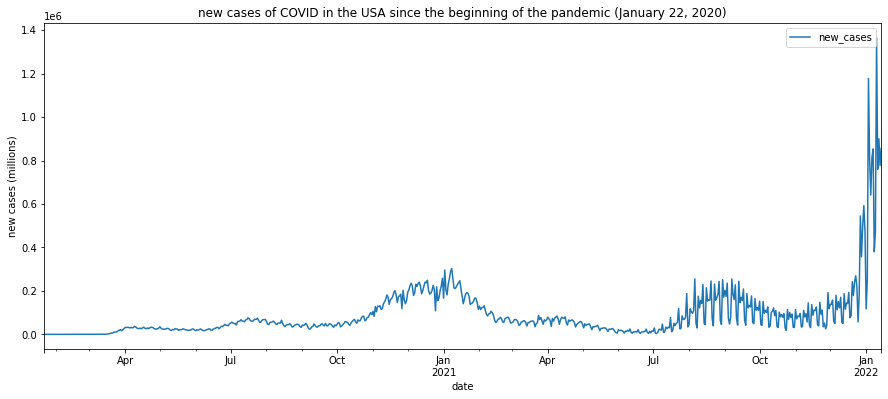

In [43]:
df_usa_ = df_usa[['date', 'new_cases']]
df_usa_['date'] = pd.to_datetime(df_usa_['date'])
df_usa_.index = df_usa_['date']
del df_usa_['date']

df_usa_.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("new cases (millions)")
plt.title("new cases of COVID in the USA since the beginning of the pandemic (January 22, 2020)")
plt.show()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


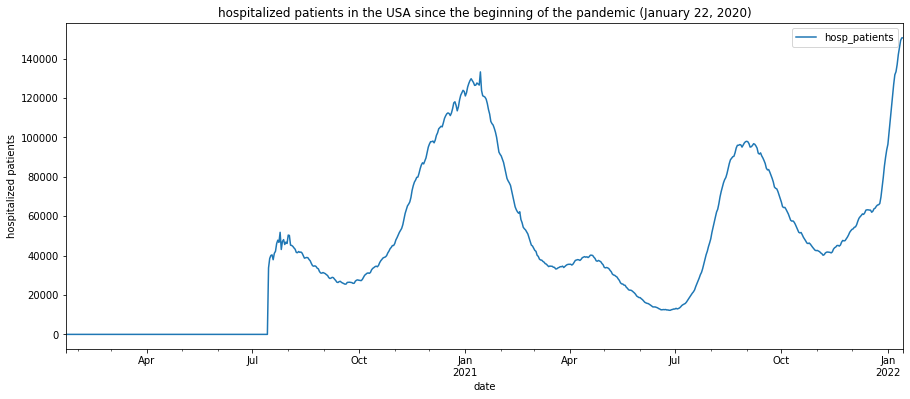

In [44]:
df_usa_1 = df_usa[['date', 'hosp_patients']]
df_usa_1['date'] = pd.to_datetime(df_usa_1['date'])
df_usa_1.index = df_usa_1['date']
del df_usa_1['date']

df_usa_1.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("hospitalized patients")
plt.title("hospitalized patients in the USA since the beginning of the pandemic (January 22, 2020)")
plt.show()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


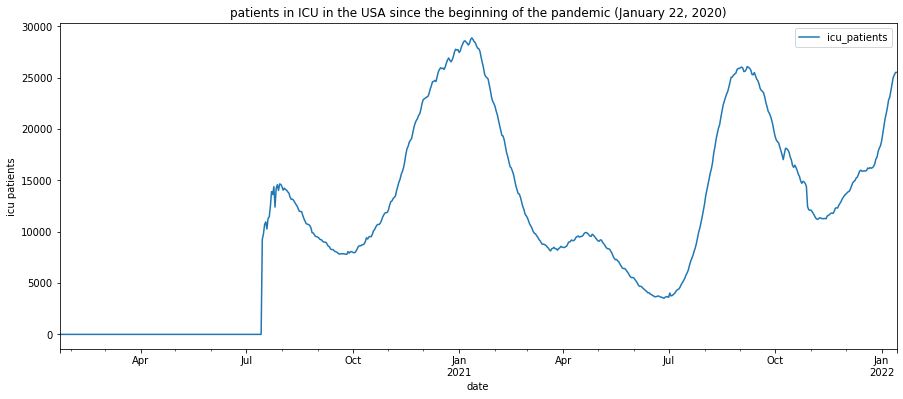

In [45]:
df_usa_2 = df_usa[['date', 'icu_patients']]
df_usa_2['date'] = pd.to_datetime(df_usa_2['date'])
df_usa_2.index = df_usa_2['date']
del df_usa_2['date']

df_usa_2.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("icu patients")
plt.title("patients in ICU in the USA since the beginning of the pandemic (January 22, 2020)")
plt.show()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


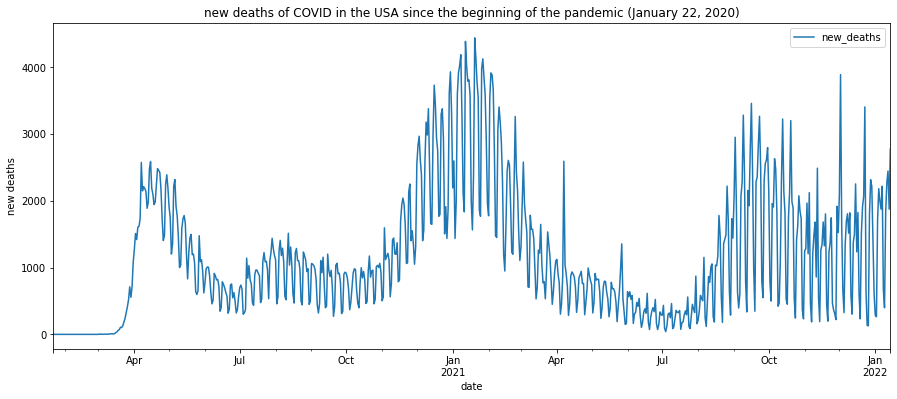

In [46]:
df_usa_3 = df_usa[['date', 'new_deaths']]
df_usa_3['date'] = pd.to_datetime(df_usa_3['date'])
df_usa_3.index = df_usa_3['date']
del df_usa_3['date']

df_usa_3.plot(figsize=(15,6))
#plt.xlabel("time")
plt.ylabel("new deaths")
plt.title("new deaths of COVID in the USA since the beginning of the pandemic (January 22, 2020)")
plt.show()

In [55]:
#creating dataset for the USA since the beginning of vaccination there
#for the USA the first date for non-zero numbers for both people_vaccinated and people_fully_vaccinated is 2020-12-13
df_filter = df['location']=='United States'
df_usa = df[df_filter]
df_usa = df_usa[['date','total_cases','new_cases','total_deaths','new_deaths',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','new_vaccinations','population']]
df_usa = df_usa.fillna(method='ffill')
df_usa = df_usa.fillna(0)
df_filter = df_usa['date']>='2020-12-13'
df_usa = df_usa[df_filter]
df_usa.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population
146948,2022-01-10,61626123.0,1364418.0,839863.0,1835.0,523624949.0,247798779.0,206858336.0,77704911.0,1116762.0,332915074.0
146949,2022-01-11,62385927.0,759804.0,842141.0,2278.0,524740160.0,248101414.0,207031762.0,78347179.0,1115211.0,332915074.0
146950,2022-01-12,63285605.0,899678.0,844588.0,2447.0,525499067.0,248306493.0,207153238.0,78782233.0,758907.0,332915074.0
146951,2022-01-13,64062060.0,776455.0,846463.0,1875.0,525604448.0,248338447.0,207170846.0,78837404.0,105381.0,332915074.0
146952,2022-01-14,64917963.0,855903.0,849241.0,2778.0,525604449.0,248338448.0,207170846.0,78837404.0,1.0,332915074.0


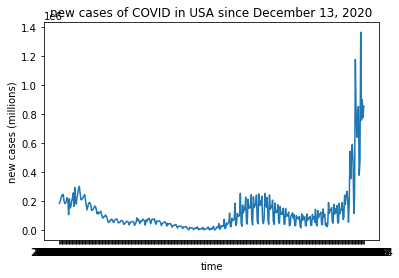

In [48]:
plt.plot(df_usa['date'], df_usa['new_cases'])
plt.xlabel("time")
plt.ylabel("new cases (millions)")
plt.title("new cases of COVID in USA since December 13, 2020")
plt.show()

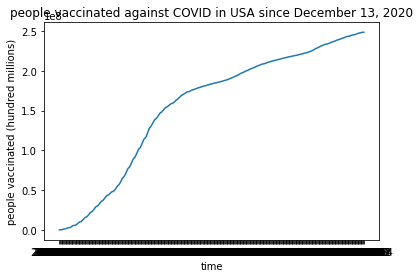

In [49]:
plt.plot(df_usa['date'], df_usa['people_vaccinated'])
plt.xlabel("time")
plt.ylabel("people vaccinated (hundred millions)")
plt.title("people vaccinated against COVID in USA since December 13, 2020")
plt.show()

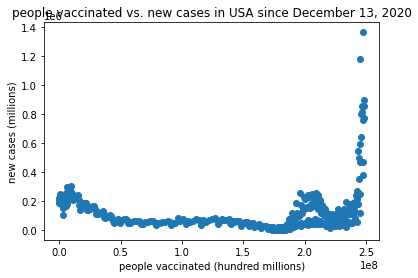

In [50]:
plt.scatter(df_usa['people_vaccinated'], df_usa['new_cases'])
plt.xlabel("people vaccinated (hundred millions)")
plt.ylabel("new cases (millions)")
plt.title("people vaccinated vs. new cases in USA since December 13, 2020")
plt.show()

In [51]:
scipy.stats.pearsonr(df_usa['people_vaccinated'], df_usa['new_cases'])

(0.08477196114827103, 0.09123526755421862)

Correlation coefficient is close to zero, but p-value is very high.

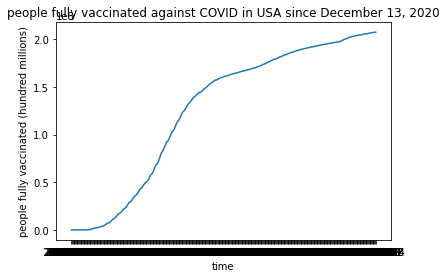

In [52]:
plt.plot(df_usa['date'], df_usa['people_fully_vaccinated'])
plt.xlabel("time")
plt.ylabel("people fully vaccinated (hundred millions)")
plt.title("people fully vaccinated against COVID in USA since December 13, 2020")
plt.show()

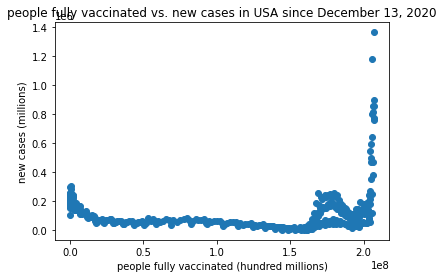

In [53]:
plt.scatter(df_usa['people_fully_vaccinated'], df_usa['new_cases'])
plt.xlabel("people fully vaccinated (hundred millions)")
plt.ylabel("new cases (millions)")
plt.title("people fully vaccinated vs. new cases in USA since December 13, 2020")
plt.show()

In [54]:
scipy.stats.pearsonr(df_usa['people_fully_vaccinated'], df_usa['new_cases'])

(0.08777853888717527, 0.08028308493165508)

Again, correlation coefficient is close to zero, but p-value is very high.

Diagrams for the USA show that in spite of the growth of the number of vaccinated and fully vaccinated people, the number of recent new cases is very high.

I analyzed data for other countries, and they show similar dynamics in all the countries: the number of new cases of COVID is growing or is very high in spite of the growth of fully vaccinated people.

<h3>Conclusion</h3>

EDA and visualization of data for the world, for UAE, USA, and other countries indicate recent growth of new cases of COVID in spite of the progress of vaccination. Recent wave of COVID does not seem to allow to build a model of the effect of vaccination on decrease of the number of cases of COVID.

Due to this reason, instead of building of a model of the effect of vaccination against COVID, in the next notebook, I will build a model of the progress of vaccination in the world.